In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calc_sq_dist(X, K_means):
    """
    This function calculates the squared distance of a data point from
    any one of the centroids.
    """
    mat = []
    for x in X:
        sq_distances = []
        for centroid in K_means:
            sq_distances.append(calc_sq_distance_point(x, centroid))
        mat.append(np.array(sq_distances))
    return np.array(mat)

def calc_sq_distance_point(x, y):
    return np.sum((x - y) ** 2)

def determine_rank(sq_dist_mat):
    """
    Determines cluster assignment based on the squared distance from a centroid
    :param sq_dist_mat: squared distance
    :return:
    """
    m = np.argmin(sq_dist_mat, axis = 1)
    return np.eye(sq_dist_mat.shape[1])[m]

def recalc_centroids(X, rank):
    """
    Re-calculate cluster centroids based on updated cluster assignment
    :param X:
    :param rank:
    :return:
    """
    return (np.divide(X.T.dot(rank), np.sum(rank, axis = 0))).T

In [3]:
def determine_rank_dict(sq_dist_mat):
    rank_dict = {}
    for index, row in enumerate(sq_dist_mat):
        rank_assignment = np.argmin(row) + 1
        rank_dict[index] = rank_assignment
    return rank_dict

def recalc_centroids_dict(X, rank):
    groups = {}
    for (k, v) in rank.values():
        if v not in groups:
            groups[v] = np.array([k])
        else:
            groups[v] = np.append(groups[v], k)
    means = []
    for group in groups:
        centroid_mean = np.mean(X[groups[group],:], axis=0)
        means.append(centroid_mean)
    return np.array(means)

In [4]:
def plot_current(data, rank, k_means):
    row, col = np.shape(data)
    k = np.shape(k_means)[0]
    color_mat = np.matrix([[1,0,0],
                           [0,1,0],
                           [0,0,1],
                           [0,0,0],
                           [1,1,0],
                           [1,0,1],
                           [0,1,1]])
    k_color_mat = color_mat[0:k]
    color_vector = rank.dot(k_color_mat)
    mu_color_vector = np.eye(k).dot(k_color_mat)
    plt.scatter(data[:,0], data[:,1], edgecolors = color_vector, marker = 'o', facecolors = 'none', alpha = 0.3)
    plt.scatter(k_means[:, 0], k_means[:, 1], c = mu_color_vector, marker = 'D', s = 50)

In [5]:
def run_kmeans(data, k=2):
    row = np.shape(data)[0]
    col = np.shape(data)[1]
    kmeans = np.zeros((row, col))
    rank = np.zeros((row, k))
    random_inds = np.random.permutation(row)
    kmeans = data[random_inds[:k]]
    max_iteration = 1000
    for iter in range(max_iteration):
        sq_dist_mat = calc_sq_dist(data, kmeans)
        rank = determine_rank(sq_dist_mat)
        kmeans_old = kmeans
        kmeans = recalc_centroids(data, rank)
        if sum(abs(kmeans_old.flatten() - kmeans.flatten())) < 1e-6:
            break
    return kmeans, rank

In [6]:
df = pd.read_csv('data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
student_df = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
student_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [8]:
df = df.dropna(axis=0)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
student_df.to_csv('data/penguins_data.csv', index=False)

In [10]:
data = df[['culmen_length_mm', 'culmen_depth_mm']].iloc[:15,:].to_numpy()
centroids, rank_mat = run_kmeans(data, k=3)
print('done')

done


In [11]:
centroids

array([[44.25      , 21.1       ],
       [39.41111111, 18.87777778],
       [35.575     , 19.15      ]])

In [12]:
rank_mat

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

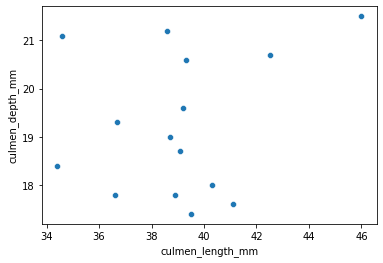

In [13]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df[['culmen_length_mm', 'culmen_depth_mm']].iloc[:15,:])

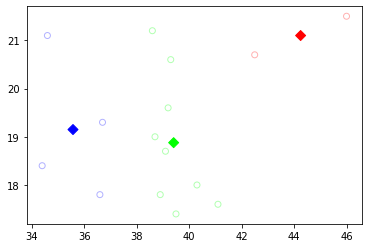

In [14]:
plot_current(data, rank_mat, centroids)

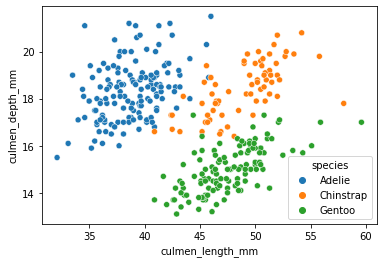

In [15]:
sns.scatterplot(data=df, x=df['culmen_length_mm'], y=df['culmen_depth_mm'], hue=df['species'])
plt.show()

In [16]:
data = df[['culmen_length_mm', 'flipper_length_mm']].to_numpy()
centroids, rank_mat = run_kmeans(data, k=3)
print('done')

done


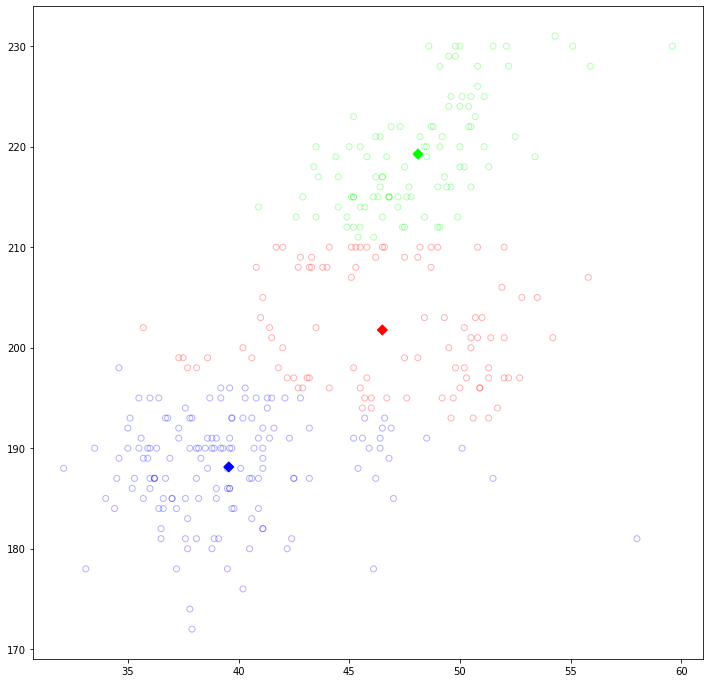

In [17]:
plt.figure(figsize=(12,12,))
plot_current(data, rank_mat, centroids)

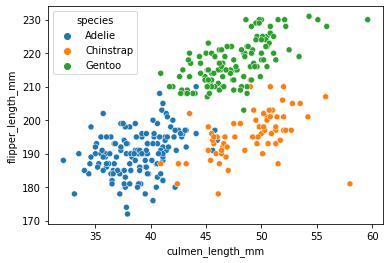

In [18]:
sns.scatterplot(data=df, x=df['culmen_length_mm'], y=df['flipper_length_mm'], hue=df['species'])
plt.show()

In [19]:
data = df[['culmen_length_mm', 'body_mass_g']].to_numpy()
centroids, rank_mat = run_kmeans(data, k=3)
print('done')

done


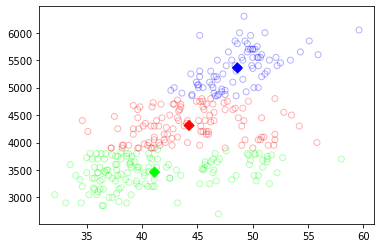

In [20]:
plot_current(data, rank_mat, centroids)

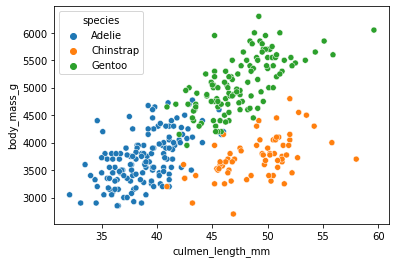

In [21]:
sns.scatterplot(data=df, x=df['culmen_length_mm'], y=df['body_mass_g'], hue=df['species'])
plt.show()

# How to Assess the Clusters Yielded By K-Means?

## Elbow Curve (Find the Optimal Number of Clusters)

In [22]:
def calculate_sum_of_squared_distances(centroids, rank_mat, data):
    sum_squared_distance = 0
    for i in range(len(data)):
        sum_squared_distance += calc_sq_distance_point(data[i], centroids[np.argmax(rank_mat[i])])
    return sum_squared_distance

In [23]:
data = df[['culmen_length_mm', 'body_mass_g']].to_numpy()

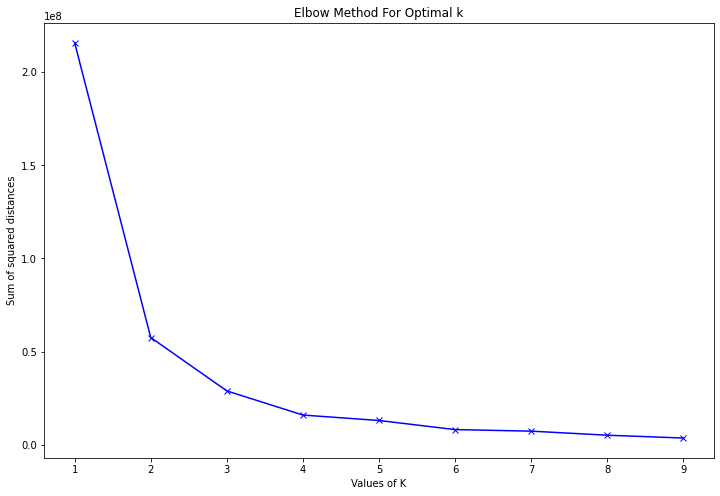

In [24]:
distances = []
K = range(1,10)
for num_clusters in K :
    centroids, rank_matrix = run_kmeans(data, k=num_clusters)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))
plt.figure(figsize=(12, 8))
plt.plot(K, distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
data = df[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()

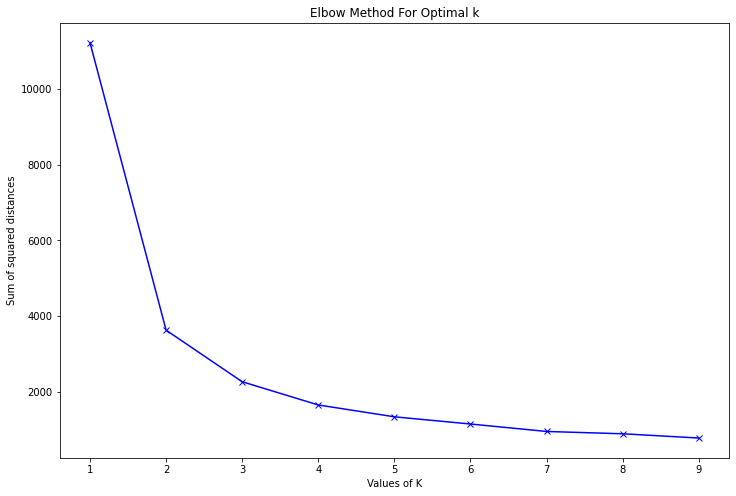

In [26]:
distances = []
K = range(1,10)
for num_clusters in K :
    centroids, rank_matrix = run_kmeans(data, k=num_clusters)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))
plt.figure(figsize=(12, 8))
plt.plot(K, distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
data = df[['culmen_length_mm', 'flipper_length_mm']].to_numpy()

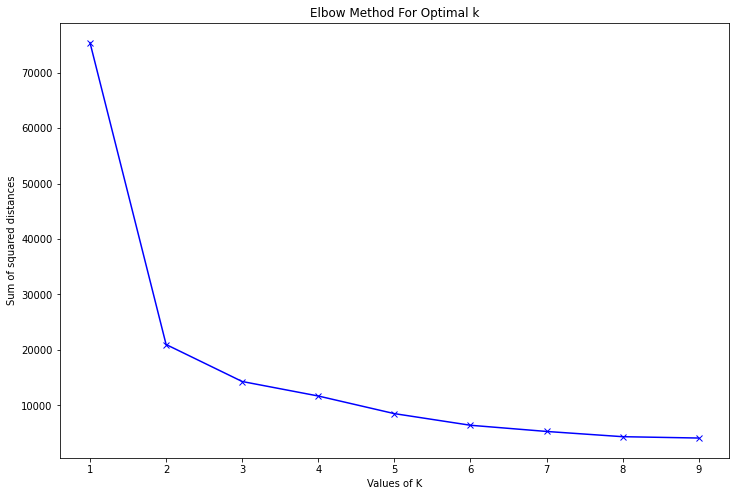

In [28]:
distances = []
K = range(1,10)
for num_clusters in K :
    centroids, rank_matrix = run_kmeans(data, k=num_clusters)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))
plt.figure(figsize=(12, 8))
plt.plot(K, distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

## Silhouette Analysis

In [29]:
def reverse_rank_matrix(rank_matrix):
    rank_df = pd.DataFrame(rank_matrix, columns=range(rank_matrix.shape[1]))
    return rank_df.idxmax(axis=1)

In [30]:
rank_matrix

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
reverse_rank_matrix(rank_matrix)

0      6
1      0
2      8
3      8
4      0
      ..
329    2
330    2
331    4
332    5
333    7
Length: 334, dtype: int64

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [33]:
data = df[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()

For n_clusters = 2 The average silhouette_score is : 0.5726434594796348
For n_clusters = 3 The average silhouette_score is : 0.48501027345331904
For n_clusters = 4 The average silhouette_score is : 0.4356482675379117
For n_clusters = 5 The average silhouette_score is : 0.411267585475454
For n_clusters = 6 The average silhouette_score is : 0.38211449003566683
For n_clusters = 7 The average silhouette_score is : 0.44508043543626313
For n_clusters = 8 The average silhouette_score is : 0.39574387644674963
For n_clusters = 9 The average silhouette_score is : 0.37541729686342895


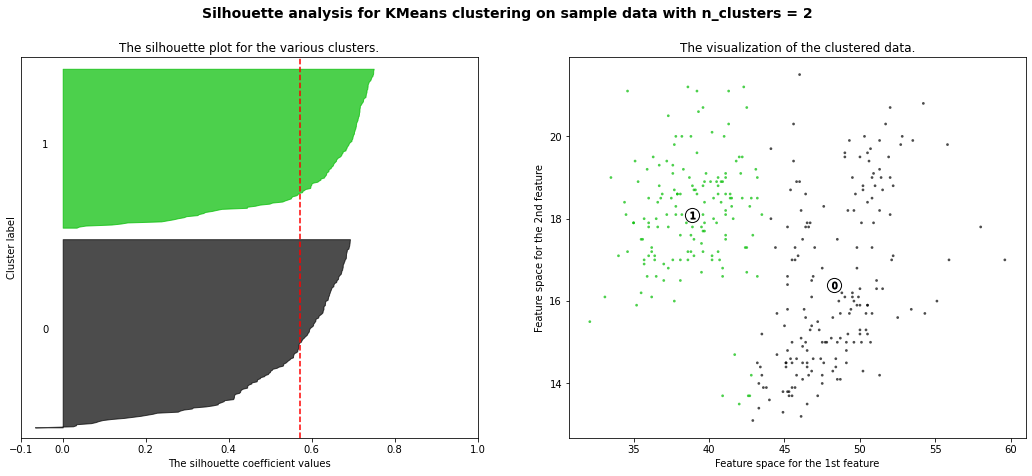

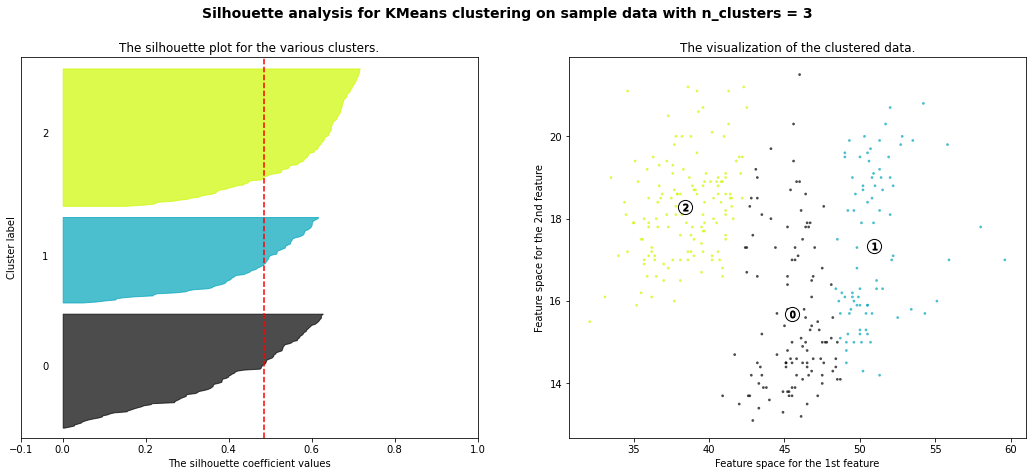

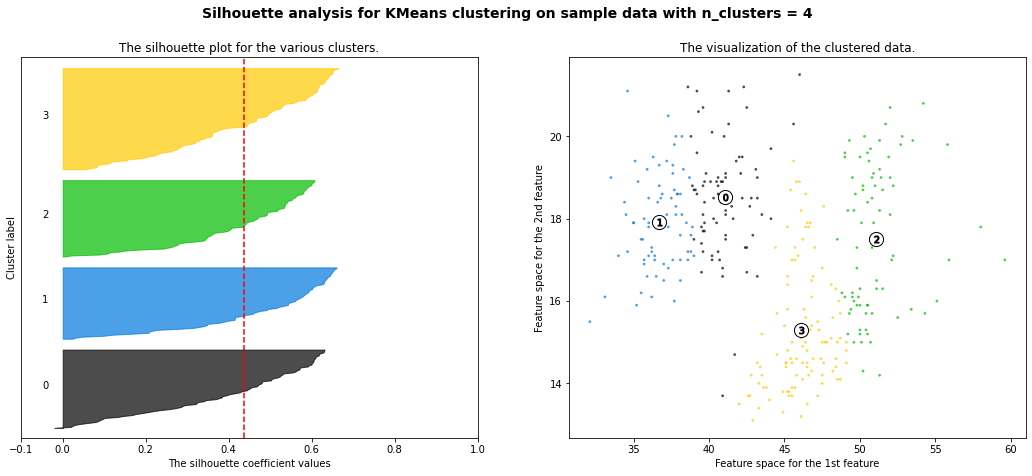

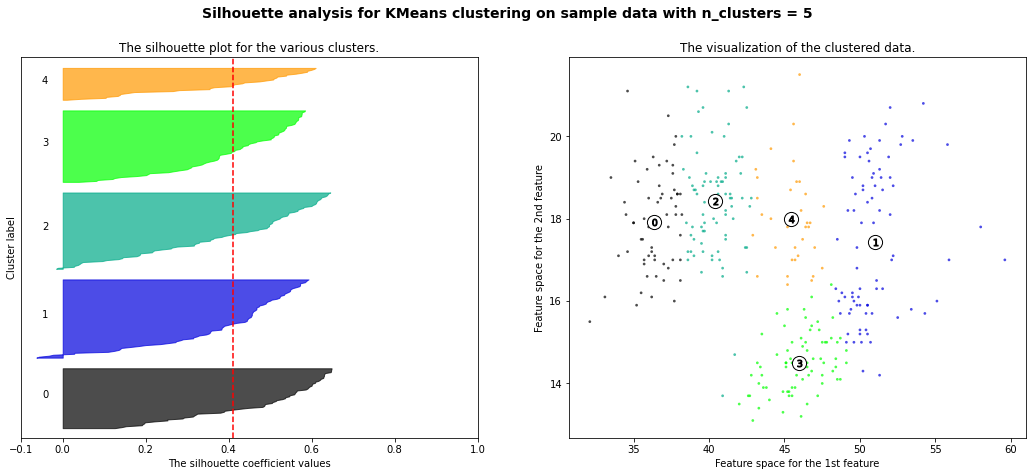

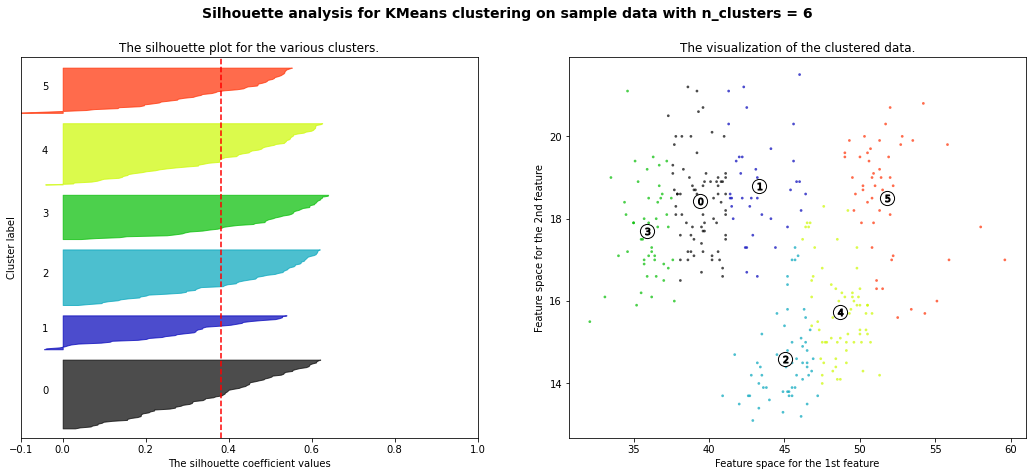

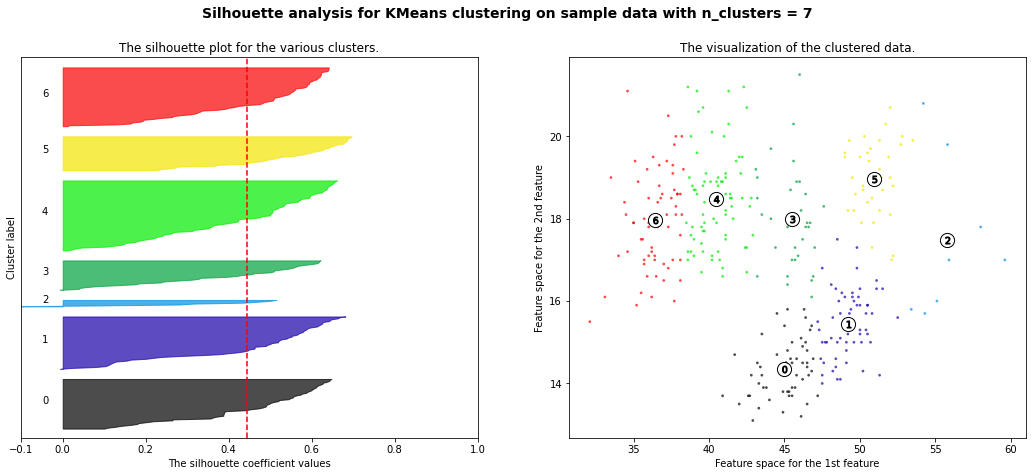

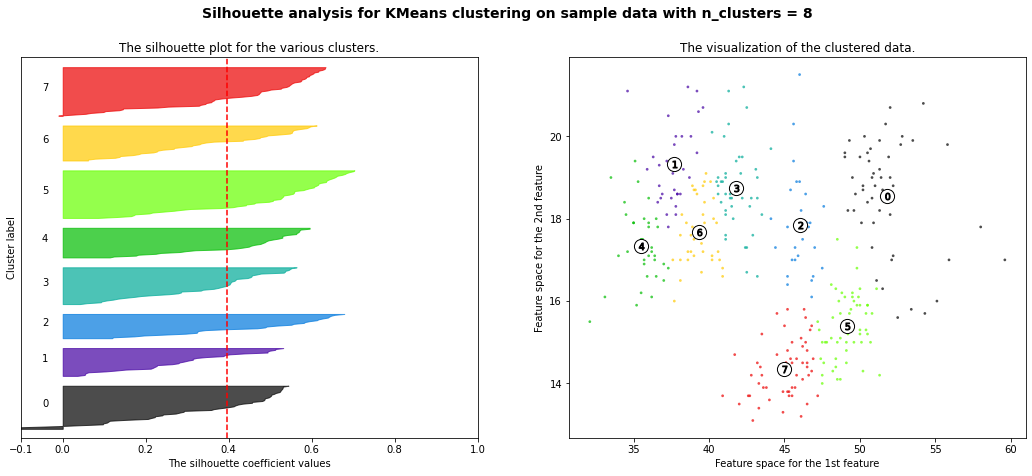

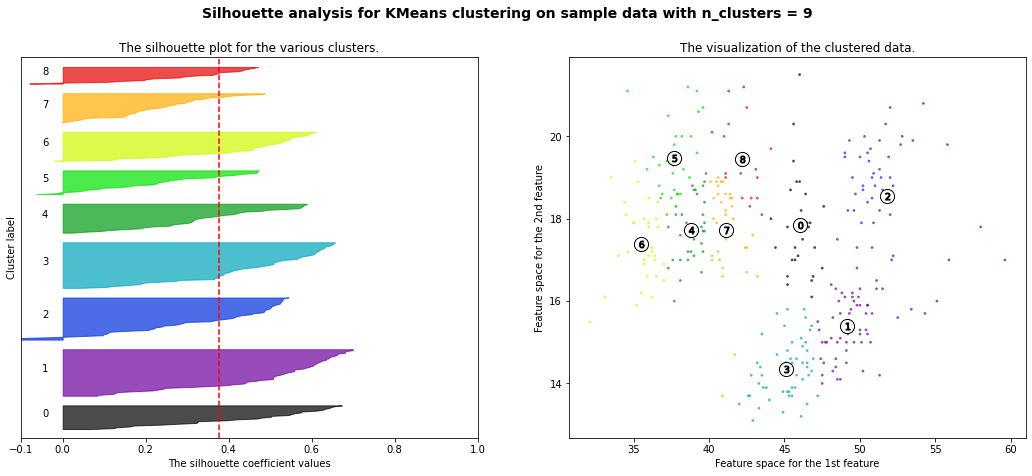

In [34]:
K = range(2,10)

for n_clusters in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    centroids, rank_matrix = run_kmeans(data, k=n_clusters)
    rank_labels = reverse_rank_matrix(rank_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, rank_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, rank_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[rank_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(rank_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = centroids
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5726434594796348
For n_clusters = 3 The average silhouette_score is : 0.48501027345331904
For n_clusters = 4 The average silhouette_score is : 0.43631559454700286
For n_clusters = 5 The average silhouette_score is : 0.4075784773665684
For n_clusters = 6 The average silhouette_score is : 0.4339597081178612
For n_clusters = 7 The average silhouette_score is : 0.4065288224193252
For n_clusters = 8 The average silhouette_score is : 0.3855972101372273
For n_clusters = 9 The average silhouette_score is : 0.39383230309747136


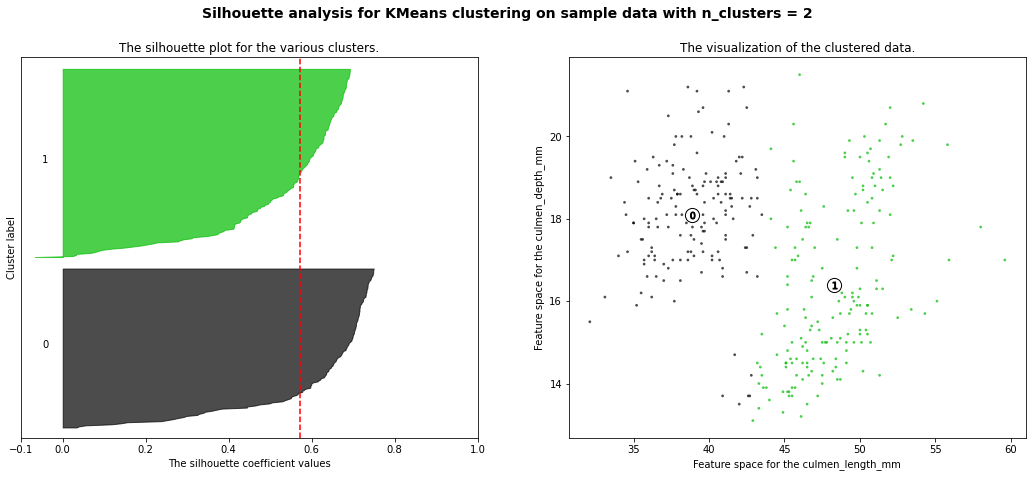

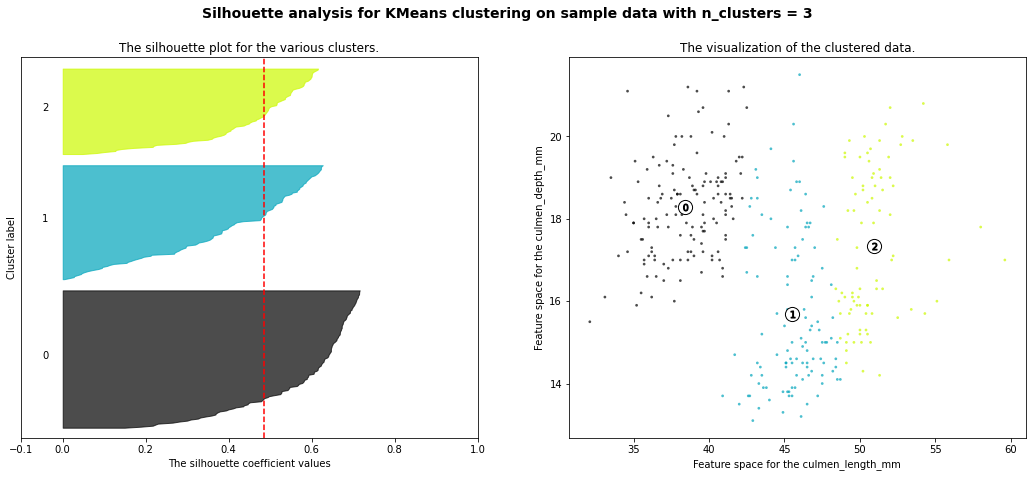

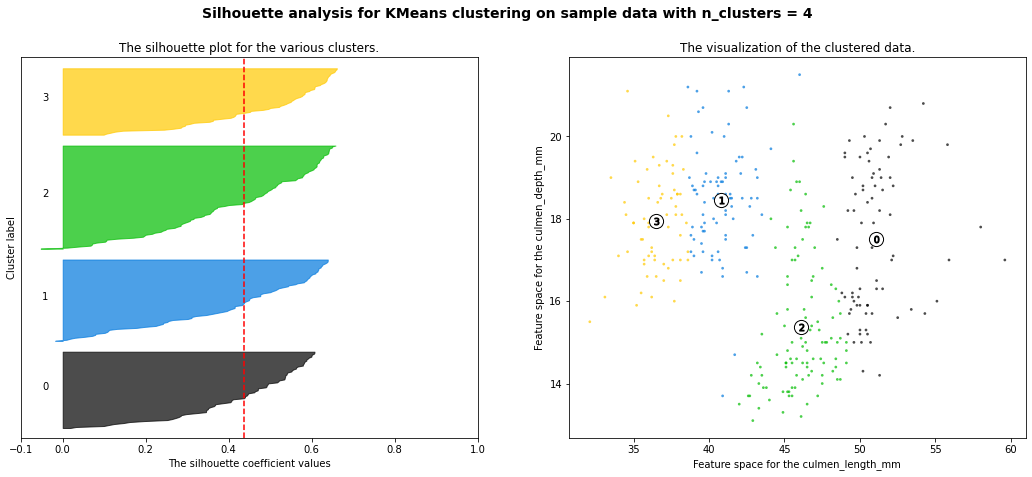

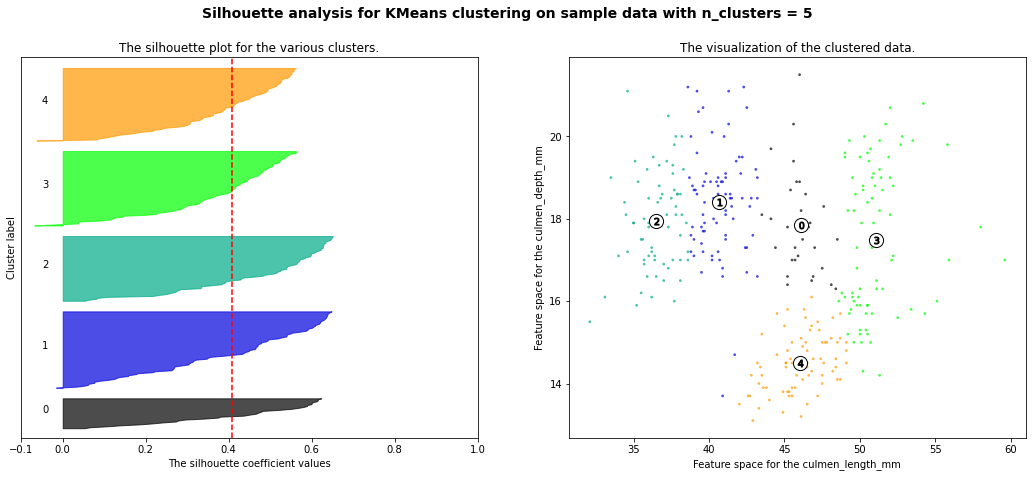

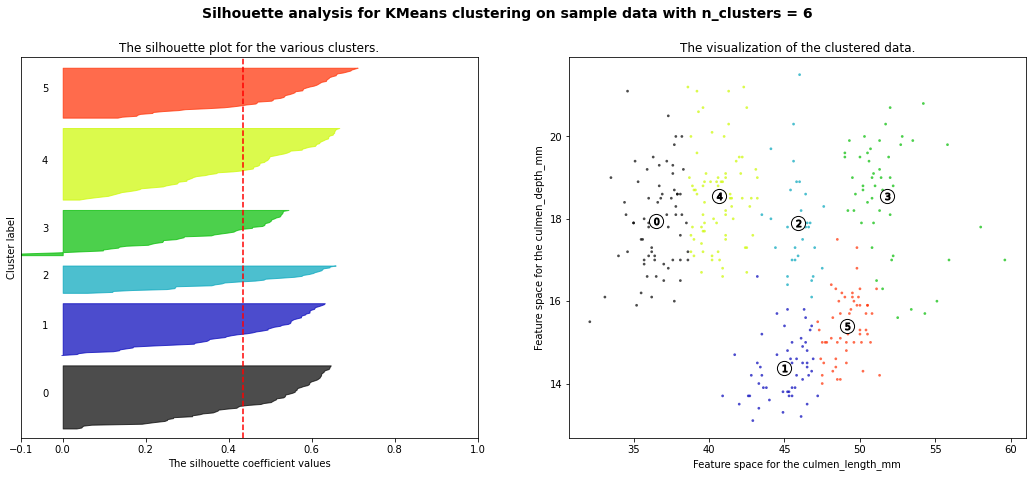

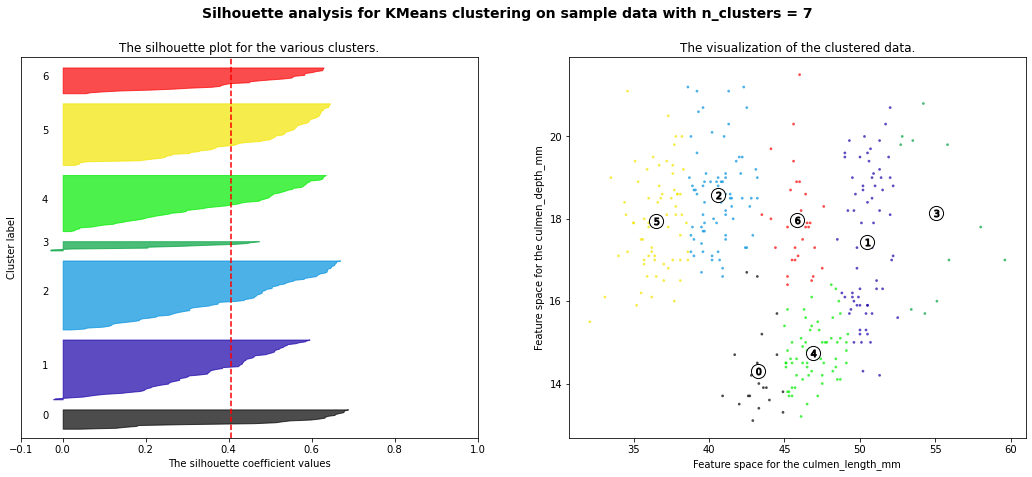

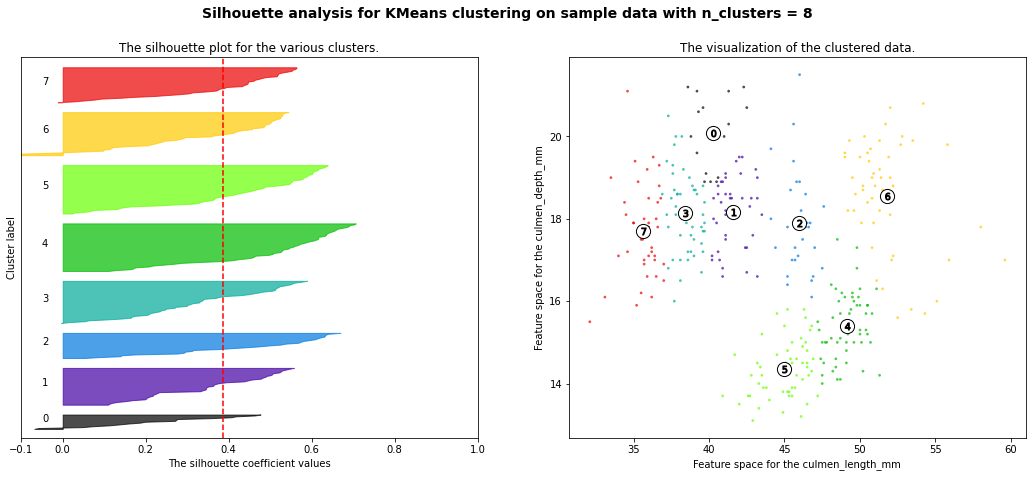

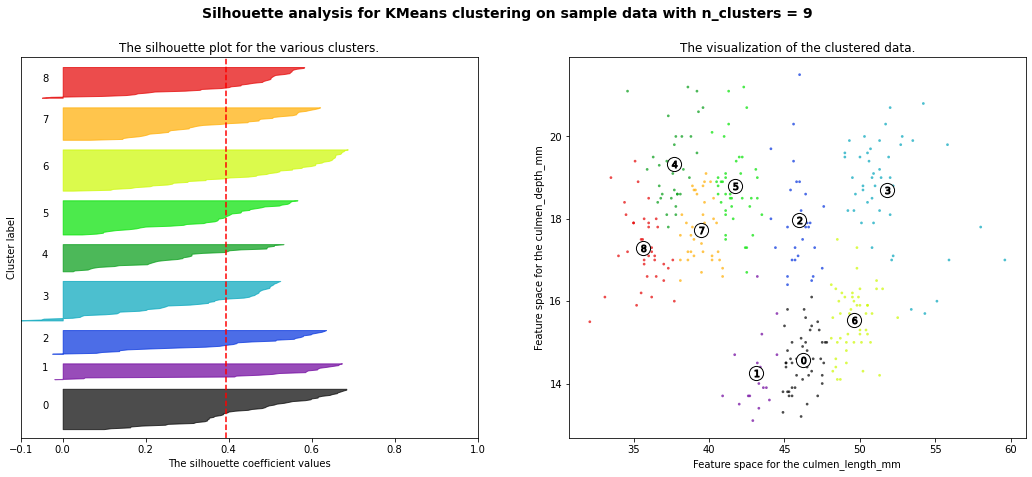

In [35]:
%run run_silhouette

# Test the goodness of K-Means clusters

In [37]:
def find_nearest_neighbor(true, possible_neighbors):
    distances = []
    for candidate in possible_neighbors:
        distances.append(calc_sq_distance_point(true, candidate))
    distances = np.array(distances)
    nearest_neighbor = possible_neighbors[np.argmin(distances)]
    return nearest_neighbor

In [36]:
def calc_cluster_deviation(true_centroids, kmean_centroids):
    sq_distances = 0
    for centroid in true_centroids:
        nn = find_nearest_neighbor(centroid, kmean_centroids)
        sq_distances += calc_sq_distance_point(centroid, nn)
    return sq_distances

In [38]:
sample_df = df[['culmen_length_mm', 'body_mass_g', 'species']]
true_centroids = sample_df.groupby('species').mean()
true_centroids

,culmen_length_mm,body_mass_g
species,,
Adelie,38.823973,3706.164384
Chinstrap,48.833824,3733.088235
Gentoo,47.542500,5090.625000


In [39]:
centroids, rank_mat = run_kmeans(sample_df[['culmen_length_mm', 'body_mass_g']].to_numpy(), 3)
centroids

array([[  49.30655738, 5501.63934426],
       [  41.39277108, 3536.44578313],
       [  45.00186916, 4515.65420561]])

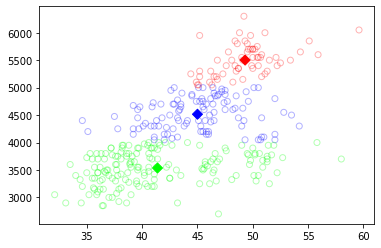

In [40]:
data = sample_df[['culmen_length_mm', 'body_mass_g']].to_numpy()
plot_current(data, rank_mat, centroids)

In [41]:
true_centroids = true_centroids.to_numpy()

In [42]:
find_nearest_neighbor(true_centroids[1], centroids)

array([  41.39277108, 3536.44578313])

In [43]:
calc_cluster_deviation(true_centroids, centroids)

236470.52839866228

In [44]:
data = df[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

In [45]:
np.std(distances)

0.0

In [46]:
np.mean(distances)

2266.0775969547108

In [47]:
data = df[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=2)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

In [48]:
np.std(distances)

0.4605995544462351

In [49]:
np.mean(distances)

3628.4731437857263

In [50]:
data = df[['culmen_length_mm', 'flipper_length_mm']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

/Users/Muchan/Desktop/UCSD-2021-2022/COSMOS Cluster 12 Summer 2022/Task 2 (K-Means)/Project Penguin/KMeans_essential.py:40: RuntimeWarning: invalid value encountered in true_divide
  return (np.divide(X.T.dot(rank), np.sum(rank, axis = 0))).T


(array([499.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([13868.78619216, 20022.31600707, 26175.84582199, 32329.3756369 ,
        38482.90545182, 44636.43526674, 50789.96508165, 56943.49489657,
        63097.02471148, 69250.5545264 , 75404.08434132]),
 <BarContainer object of 10 artists>)

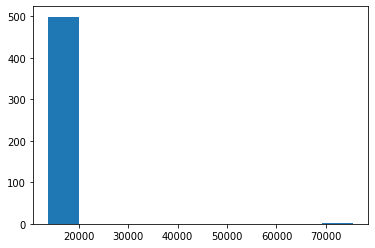

In [51]:
plt.hist(distances)

In [52]:
np.mean(distances)

14161.503108533672

In [53]:
np.std(distances)

2748.820937463431

In [54]:
14016.439707365647 + 2 * 195.20111639618818

14406.841940158023

In [55]:
14019.074404664807 + 2 * 193.121685593776

14405.31777585236

In [56]:
data = df[['culmen_length_mm', 'body_mass_g']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

(array([ 40.,   0., 112.,   0.,  18.,   0.,   0.,   0.,   0., 330.]),
 array([28500525.91330307, 28551531.30447533, 28602536.69564759,
        28653542.08681986, 28704547.47799212, 28755552.86916438,
        28806558.26033664, 28857563.65150891, 28908569.04268117,
        28959574.43385343, 29010579.8250257 ]),
 <BarContainer object of 10 artists>)

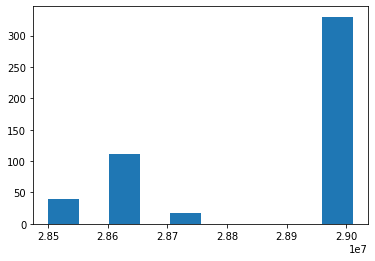

In [57]:
plt.hist(distances)

In [58]:
np.mean(distances)

28856589.303710356

In [59]:
np.std(distances)

177847.23564421822

In [60]:
data = df[['culmen_depth_mm', 'body_mass_g']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

(array([ 41.,   0., 126.,   0.,  26.,   0.,   0.,   0.,   0., 307.]),
 array([28494538.31844927, 28545535.20068529, 28596532.08292131,
        28647528.96515733, 28698525.84739335, 28749522.72962937,
        28800519.61186539, 28851516.49410141, 28902513.37633743,
        28953510.25857345, 29004507.14080947]),
 <BarContainer object of 10 artists>)

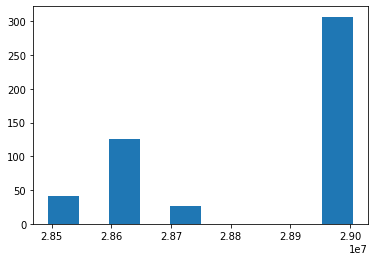

In [61]:
plt.hist(distances)

In [62]:
np.mean(distances)

28835791.69345513

In [63]:
np.std(distances)

180119.92586724626

In [64]:
data = df[['culmen_depth_mm', 'flipper_length_mm']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

(array([160.,   0., 155.,   0.,   0.,   0.,   0.,  10.,  46., 129.]),
 array([8949.99928898, 9050.16470389, 9150.3301188 , 9250.49553372,
        9350.66094863, 9450.82636354, 9550.99177846, 9651.15719337,
        9751.32260828, 9851.4880232 , 9951.65343811]),
 <BarContainer object of 10 artists>)

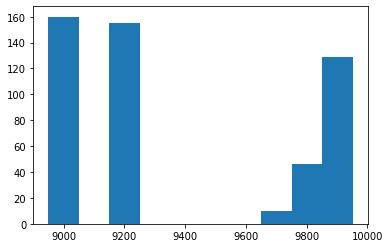

In [65]:
plt.hist(distances)

In [66]:
np.mean(distances)

9378.055002615665

In [67]:
np.std(distances)

415.58930887769867

(array([160.,   0., 155.,   0.,   0.,   0.,   0.,  10.,  46., 128.]),
 array([8949.99928898, 9050.16470389, 9150.3301188 , 9250.49553372,
        9350.66094863, 9450.82636354, 9550.99177846, 9651.15719337,
        9751.32260828, 9851.4880232 , 9951.65343811]),
 <BarContainer object of 10 artists>)

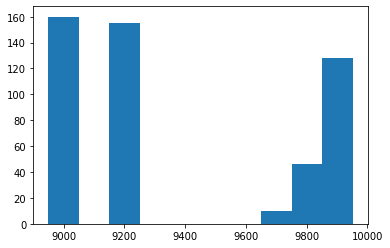

In [68]:
distances.remove(max(distances))
plt.hist(distances)

In [69]:
np.mean(distances)

9376.905506752952

In [70]:
np.std(distances)

415.2106988914538

In [71]:
data = df[['body_mass_g', 'flipper_length_mm']].to_numpy()
distances = []
for iter in range(500):
    centroids, rank_matrix = run_kmeans(data, k=3)
    distances.append(calculate_sum_of_squared_distances(centroids, rank_matrix, data))

(array([ 57.,   0., 112.,   0.,  21.,   0.,   0.,   0.,   0., 310.]),
 array([28511466.63446904, 28562550.58289748, 28613634.53132593,
        28664718.47975437, 28715802.42818281, 28766886.37661126,
        28817970.3250397 , 28869054.27346814, 28920138.22189659,
        28971222.17032503, 29022306.11875347]),
 <BarContainer object of 10 artists>)

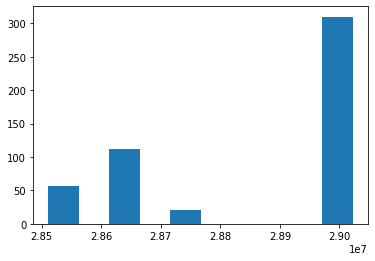

In [72]:
plt.hist(distances)

(array([ 57.,   0., 112.,   0.,  21.,   0.,   0.,   0.,   0., 309.]),
 array([28511466.63446904, 28562550.58289748, 28613634.53132593,
        28664718.47975437, 28715802.42818281, 28766886.37661126,
        28817970.3250397 , 28869054.27346814, 28920138.22189659,
        28971222.17032503, 29022306.11875347]),
 <BarContainer object of 10 artists>)

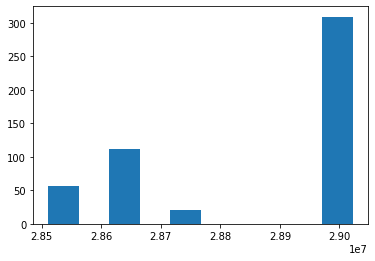

In [73]:
distances.remove(max(distances))
plt.hist(distances)

In [74]:
np.mean(distances)

28849892.95684836

In [75]:
np.std(distances)

186813.75336175246

In [76]:
import itertools

In [77]:
a = [1,2,3]

In [78]:
b = list(itertools.combinations(a, 2))

In [79]:
valid_feature_list = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [80]:
list(itertools.combinations(valid_feature_list, 2))

[('culmen_length_mm', 'culmen_depth_mm'),
 ('culmen_length_mm', 'flipper_length_mm'),
 ('culmen_length_mm', 'body_mass_g'),
 ('culmen_depth_mm', 'flipper_length_mm'),
 ('culmen_depth_mm', 'body_mass_g'),
 ('flipper_length_mm', 'body_mass_g')]

In [81]:
%run check_result

You may have falsely uncovered too many non-existing species of penguines, try adjust your K; or it may just be bad luck due to randomness, try re-run your K-Means alogrithm and see if the result changes significantly
We expect your sum of within-cluster sum of squared distances obtained from running K-Means on this pair of features to be in the range: [2266.0775969547108, 2266.0775969547108]


In [82]:
[28857800.99250205 - 2 * 184449.3469116241, 28857800.99250205 + 2 * 184449.3469116241]

[28488902.2986788, 29226699.686325297]

In [83]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
